# Análise Exploratória

#### Alunos: Ellen Shen, Enzo Neto, Gabriel Huerta, Giulia Castro

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

In [2]:
top_2017_2018 = pd.read_excel("top_2017_2018.xlsx", index_col=1)

In [3]:
top_2017_2018.head(3)

,id,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,,,,,,,,,,,,,,,
God's Plan,6DCZcSspjsKoFjzjrWoCd,Drake,754.00,449.0,7.0,-9211.0,1.0,109.0000,0.0332,0.000083,552.0,357.00,77169.0,198973.0,4.0
SAD!,3ee8Jmje8o58CHK66QrVC,XXXTENTACION,0.74,613.0,8.0,NaN,1.0,145.0000,258.0000,0.003720,123.0,473.00,75023.0,166606.0,4.0
rockstar (feat. 21 Savage),0e7ipj03S05BNilyu5bRz,Post Malone,587.00,535.0,5.0,NaN,0.0,0.0898,117.0000,0.000066,131.0,0.14,159847.0,218147.0,4.0


<IPython.core.display.Javascript object>


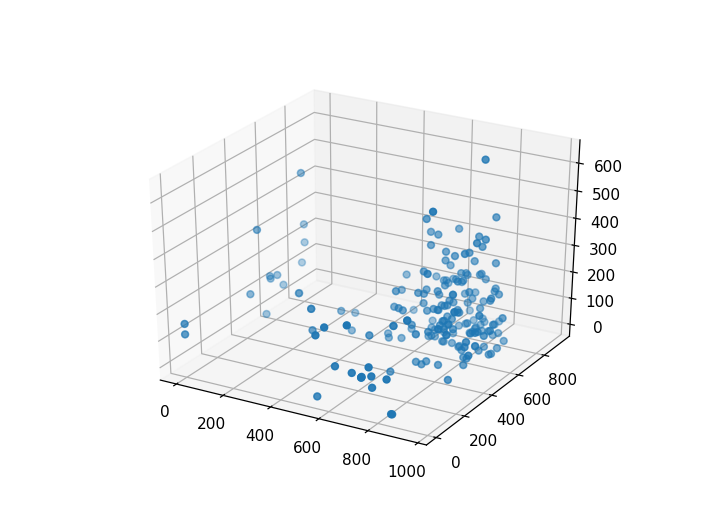

In [4]:
plt3d_2017_2018 = plt.figure().gca(projection="3d")
plt3d_2017_2018.scatter(top_2017_2018.danceability, top_2017_2018.energy, top_2017_2018.liveness)

In [5]:
dados_entrada_2017_2018 = top_2017_2018.loc[:,("danceability", "energy", "liveness")]

In [6]:
three_means_2017_2018 = cluster.MiniBatchKMeans(n_clusters=3)
three_means_2017_2018.fit(dados_entrada_2017_2018)
saida_2017_2018 = three_means_2017_2018.predict(dados_entrada_2017_2018)
saida_2017_2018

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 1], dtype=int32)

In [7]:
conjunto_2017_2018 = dados_entrada_2017_2018.copy()
conjunto_2017_2018["saida"] = saida_2017_2018
conjunto_2017_2018.head()

,danceability,energy,liveness,saida
name,,,,
God's Plan,754.00,449.0,552.0,0
SAD!,0.74,613.0,123.0,1
rockstar (feat. 21 Savage),587.00,535.0,131.0,0
Psycho (feat. Ty Dolla $ign),739.00,559.0,112.0,0
In My Feelings,835.00,626.0,396.0,0


<IPython.core.display.Javascript object>


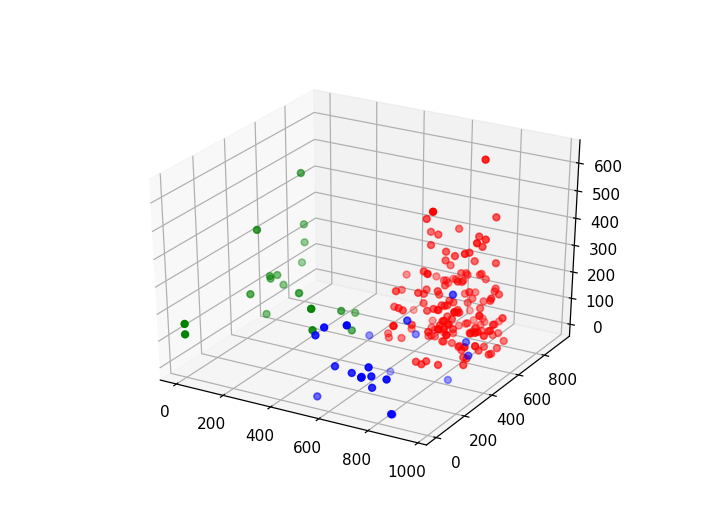

In [8]:
plt3d_2017_2018 = plt.figure().gca(projection="3d")
grupo0_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==0]
grupo1_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==1]
grupo2_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==2]

plt3d_2017_2018.scatter(grupo0_2017_2018.danceability, grupo0_2017_2018.energy, grupo0_2017_2018.liveness, color="r")
plt3d_2017_2018.scatter(grupo1_2017_2018.danceability, grupo1_2017_2018.energy, grupo1_2017_2018.liveness, color="g")
plt3d_2017_2018.scatter(grupo2_2017_2018.danceability, grupo2_2017_2018.energy, grupo2_2017_2018.liveness, color="b")

## Histogramas

In [9]:
plt.rcParams["figure.figsize"] = [5,3]
plt.rcParams["axes.titlesize"] = 10
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["lines.markersize"] = 10

<IPython.core.display.Javascript object>


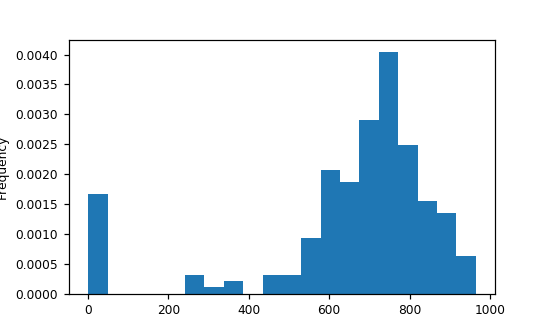

In [10]:
top_2017_2018.danceability.plot.hist(density=True, bins=20)

<IPython.core.display.Javascript object>


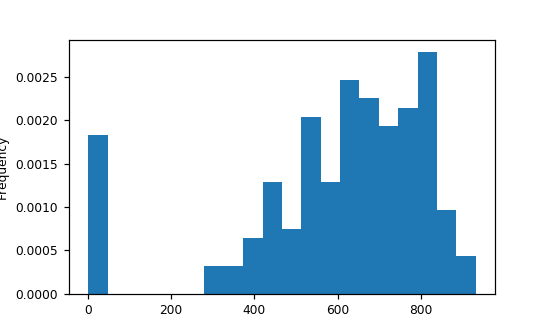

In [11]:
top_2017_2018.energy.plot.hist(density=True, bins=20)

<IPython.core.display.Javascript object>


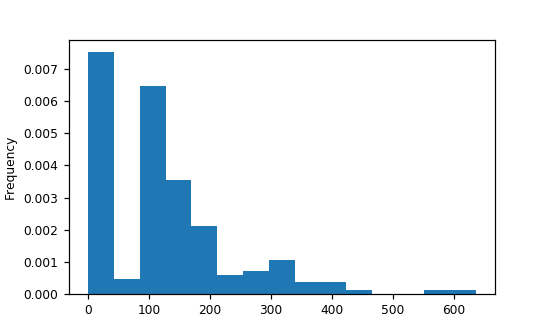

In [12]:
top_2017_2018.liveness.plot.hist(density=True, bins=15)